In [ ]:
pip install nltk

In [ ]:
pip install requests

In [ ]:
pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=853ad8690438a6d5e3b6959a492faf07d5817db409a45e18784f201de5c64439
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3819927/rs-al-quds-di-gaza-tunda-semua-operasi-di-tengah-kepungan-israel"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



				Gaza (ANTARA) - Masyarakat Bulan Sabit Merah Palestina (PRCS) pada Minggu mengumumkan bahwa Rumah Sakit Al-Quds di Kota Gaza menghentikan semua operasinya lantaran krisis bahan bakar dan pemadaman listrik di tengah pengepungan militer Israel yang ketat.
Rumah sakit milik PRCS itu sedang bergulat dengan krisis akut pasokan medis, makanan serta air.
Melalui siaran pers PRCS menyatakan keprihatinan yang mendalam atas kondisi kemanusiaan yang mengerikan di dalam rumah sakit tersebut.
Menurutnya, tim medis saat ini sedang melakukan upaya maksimal untuk memberikan perawatan medis kepada pasien dan korban luka sekalipun dengan cara tradisional.
Pernyataan itu juga meminta komunitas internasional dan seluruh negara penandatangan Konvensi Jenewa Keempat bertanggung jawab atas kehancuran sistem kesehatan dan bencana kemanusiaan di Jalur Gaza, terutama di wilayah utara.
Baca juga: Kehabisan bahan bakar, RS utama di Gaza stop beroperasi

Hingga kini, militer Israel terus menggempur sekitar Ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Gaza (ANTARA) - Masyarakat Bulan Sabit Merah Palestina (PRCS) pada Minggu mengumumkan bahwa Rumah Sakit Al-Quds di Kota Gaza menghentikan semua operasinya lantaran krisis bahan bakar dan pemadaman listrik di tengah pengepungan militer Israel yang ketat.
al: 0.1319
antara: 0.1651
bahan: 0.1464
bahwa: 0.1915
bakar: 0.1464
bulan: 0.1915
dan: 0.0937
di: 0.2027
gaza: 0.2401
israel: 0.1319
ketat: 0.1915
kota: 0.1651
krisis: 0.1464
lantaran: 0.1915
listrik: 0.1651
masyarakat: 0.1651
menghentikan: 0.1915
mengumumkan: 0.1915
merah: 0.1915
militer: 0.1319
minggu: 0.1915
operasinya: 0.1915
pada: 0.1915
palestina: 0.1915
pemadaman: 0.1915
pengepungan: 0.1915
prcs: 0.1319
quds: 0.1651
rumah: 0.1319
sabit: 0.1915
sakit: 0.1319
semua: 0.1915
tengah: 0.1651
yang: 0.1014

Kalimat 2: Rumah sakit milik PRCS itu sedang bergulat dengan krisis akut pasokan medis, makanan serta air.
air: 0.2607
akut: 0.3023
bergulat: 0.3023
dengan: 0.2607
itu: 0.2607
krisis: 0.2311
makanan: 0.2607
medis: 0.20

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1163


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1163
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.1325
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0105
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0930
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.2554
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0371
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.1772
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1632
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0911
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.1463
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.1884
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.1170
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.1686
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0458
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0317
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.0000
Cosine Similarity antara Ka

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13
Kalimat 1,1.000000,0.116254,0.132476,0.010498,0.093006,0.255406,0.000000,0.037083,0.177222,0.163238,0.091052,0.146254,0.188393
Kalimat 2,0.116254,1.000000,0.117011,0.168580,0.045750,0.031733,0.000000,0.000000,0.000000,0.201691,0.096428,0.000000,0.050370
Kalimat 3,0.132476,0.117011,1.000000,0.000000,0.098427,0.033705,0.000000,0.105013,0.129135,0.174883,0.123601,0.062002,0.072053
Kalimat 4,0.010498,0.168580,0.000000,1.000000,0.022319,0.048059,0.000000,0.013272,0.011616,0.151069,0.067766,0.107213,0.029880
Kalimat 5,0.093006,0.045750,0.098427,0.022319,1.000000,0.107237,0.000000,0.083628,0.068998,0.024048,0.149608,0.105308,0.102069
Kalimat 6,0.255406,0.031733,0.033705,0.048059,0.107237,1.000000,0.000000,0.039815,0.223786,0.089685,0.000000,0.166237,0.246495
Kalimat 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.072488,0.000000
Kalimat 8,0.037083,0.000000,0.105013,0.013272,0.083628,0.039815,0.000000,1.000000,0.098523,0.081229,0.092919,0.052534,0.031599
Kalimat 9,0.177222,0.000000,0.129135,0.011616,0.068998,0.223786,0.000000,0.098523,1.000000,0.100377,0.068920,0.148844,0.059343
Kalimat 10,0.163238,0.201691,0.174883,0.151069,0.024048,0.089685,0.000000,0.081229,0.100377,1.000000,0.059418,0.053523,0.032194


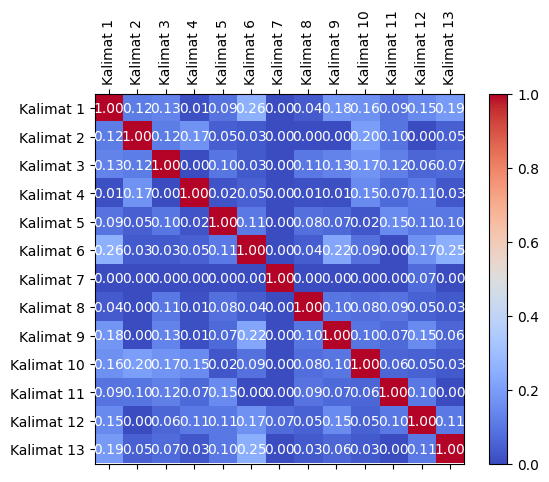

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
				Gaza (ANTARA) - Masyarakat Bulan Sabit Merah Palestina (PRCS) pada Minggu mengumumkan bahwa Rumah Sakit Al-Quds di Kota Gaza menghentikan semua operasinya lantaran krisis bahan bakar dan pemadaman listrik di tengah pengepungan militer Israel yang ketat.: 16.6855
Closeness Centrality of Rumah sakit milik PRCS itu sedang bergulat dengan krisis akut pasokan medis, makanan serta air.: 12.2886
Closeness Centrality of Melalui siaran pers PRCS menyatakan keprihatinan yang mendalam atas kondisi kemanusiaan yang mengerikan di dalam rumah sakit tersebut.: 11.5955
Closeness Centrality of Menurutnya, tim medis saat ini sedang melakukan upaya maksimal untuk memberikan perawatan medis kepada pasien dan korban luka sekalipun dengan cara tradisional.: 19.8771
Closeness Centrality of Pernyataan itu juga meminta komunitas internasional dan seluruh negara penandatangan Konvensi Jenewa Keempat bertanggung jawab atas kehancuran sistem kesehatan dan bencana kemanusiaan di Jalur 

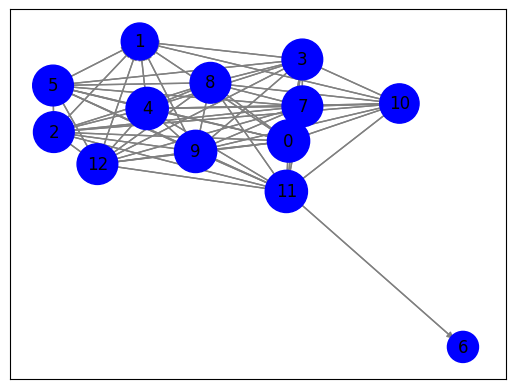

Closeness Centrality:
Node 0: 0.9231
Node 1: 0.7059
Node 2: 0.8571
Node 3: 0.8571
Node 4: 0.9231
Node 5: 0.8571
Node 6: 0.5000
Node 7: 0.8571
Node 8: 0.8571
Node 9: 0.9231
Node 10: 0.8000
Node 11: 0.9231
Node 12: 0.8571


In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")
